# 1 - Render Your First 3D Face Mesh

## Check GPU Support

In [15]:
import torch
gpu_flag = torch.cuda.is_available()
if gpu_flag: print("Your system has gpu. You can run faster codes !")
else: print("You don\'t have any gpu. You have to use your cpu. Possibly, code works slowly.")

Your system has gpu. You can run faster codes !


## Check Resources

If you have following files and folders, you can continue. If You dont have, please look at ReadMe.md file.
- ./BFM_model_front.mat

## Render Your First Face Mesh

In [16]:
# İmport libraries
from pytorch3d.structures import Meshes
from pytorch3d.renderer import TexturesVertex
import matplotlib.pyplot as pt
from utils.render import *
import numpy as np
import sys
import os

In [18]:
#Set device
if gpu_flag:
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


#Load 3D Morphable Model
bfm = sio.loadmat('BFM_model_front.mat')

#get triangles
faces = bfm['tri'].astype(np.int32)-1   # We subtract -1 beacuse index starts from 0
faces = torch.Tensor(faces).to(device)

#get mean tezture
verts_rgb = bfm['meantex'].reshape([-1, 3])/255
verts_rgb = torch.Tensor(verts_rgb).unsqueeze(0)
textures = TexturesVertex(verts_features=verts_rgb).to(device)

# get mean shape
mean_shape =  bfm['meanshape'].reshape(-1,1)
mean_shape = torch.Tensor(mean_shape).to(device)
print("Mean Shape's shape:",mean_shape.shape)


Mean Shape's shape: torch.Size([107127, 1])


In [19]:
#create and render mesh
mesh = Meshes(verts=[mean_shape.view([-1, 3])],faces=[faces], textures=textures)
images = render(mesh, angle_x=0, angle_y=0, size=256, device="cuda")

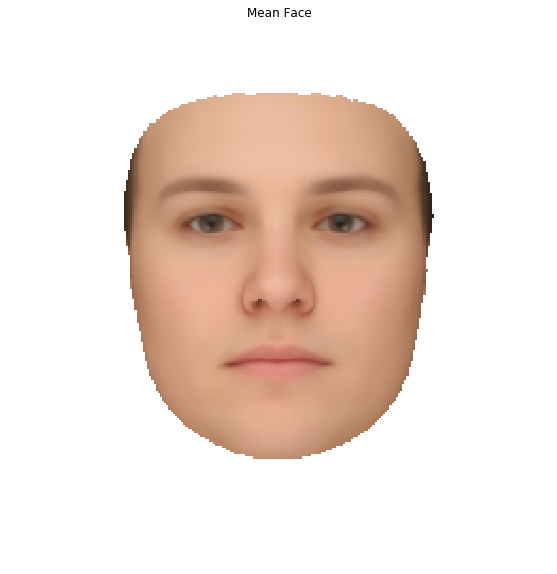

In [20]:
#show rendered mesh
fig = pt.figure(figsize=(10,10))
fig.add_subplot(1,1,1)
pt.imshow(np.clip(images[0, ..., :3].cpu().numpy(),0,1))
pt.grid("off");
pt.axis("off");
pt.title("Mean Face")
pt.show()